# Task 1: Predicting customer buying behaviour

In [1]:
!gdown 1Pll6dW2aQHUWGyAcFFqWndrrcO7PsYPt

Downloading...
From: https://drive.google.com/uc?id=1Pll6dW2aQHUWGyAcFFqWndrrcO7PsYPt
To: /content/customer_booking.csv
100% 3.15M/3.15M [00:00<00:00, 115MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.shape

(50000, 14)

In [6]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [7]:
df.duplicated().sum()

719

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [11]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [12]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [13]:
num_desc = df.describe().T
num_desc

,count,mean,std,min,25%,50%,75%,max
num_passengers,49281.0,1.590187,1.016538,1.00,1.00,1.00,2.00,9.0
purchase_lead,49281.0,84.723281,90.410229,0.00,21.00,51.00,115.00,867.0
length_of_stay,49281.0,23.053976,33.832149,0.00,5.00,17.00,28.00,778.0
flight_hour,49281.0,9.070676,5.413099,0.00,5.00,9.00,13.00,23.0
flight_day,49281.0,3.813620,1.991913,1.00,2.00,4.00,5.00,7.0
wants_extra_baggage,49281.0,0.668229,0.470854,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,49281.0,0.295631,0.456331,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,49281.0,0.426635,0.494593,0.00,0.00,0.00,1.00,1.0
flight_duration,49281.0,7.279974,1.496390,4.67,5.62,7.57,8.83,9.5
booking_complete,49281.0,0.149977,0.357052,0.00,0.00,0.00,0.00,1.0


In [14]:
cat_desc = df.describe(include="object").T
cat_desc

,count,unique,top,freq
sales_channel,49281,2,Internet,43917
trip_type,49281,3,RoundTrip,48779
route,49281,799,AKLKUL,2620
booking_origin,49281,104,Australia,17691


In [15]:
df['sales_channel'].value_counts()

sales_channel
Internet    43917
Mobile       5364
Name: count, dtype: int64

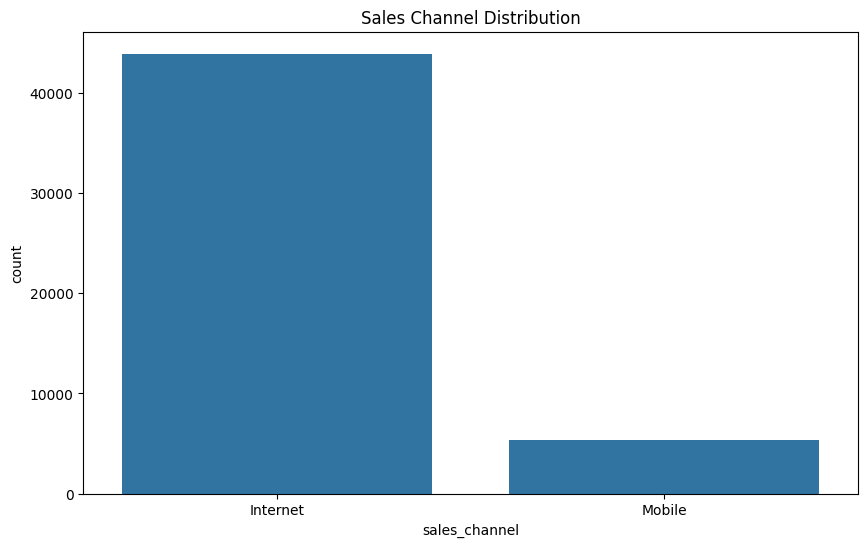

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sales_channel', data=df)
plt.title('Sales Channel Distribution')
plt.show()

In [17]:
df['trip_type'].value_counts()

trip_type
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: count, dtype: int64

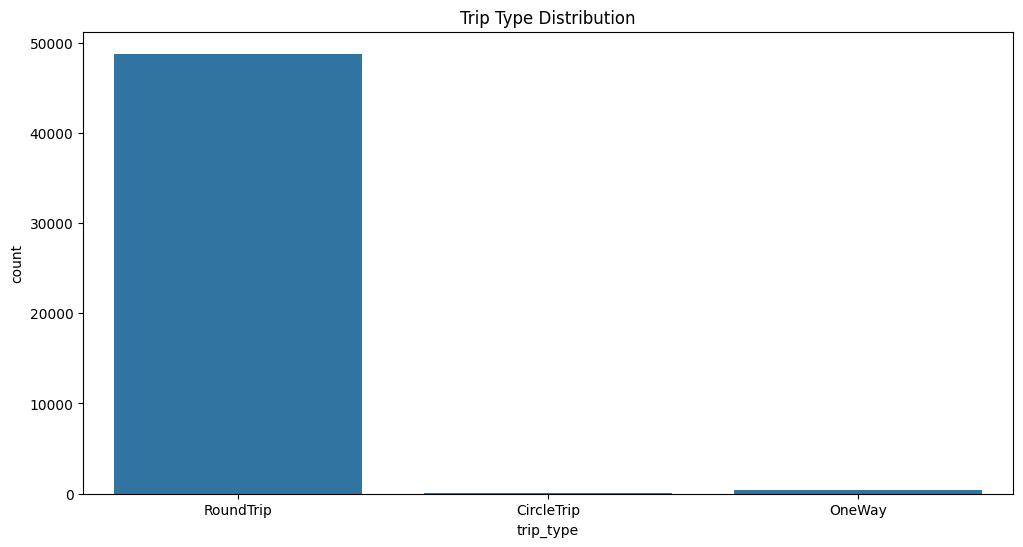

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='trip_type', data=df)
plt.title('Trip Type Distribution')
plt.show()

In [19]:
df['booking_origin'].value_counts()

booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [20]:
df['route'].value_counts()

route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [21]:
df['booking_origin'].value_counts()

booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

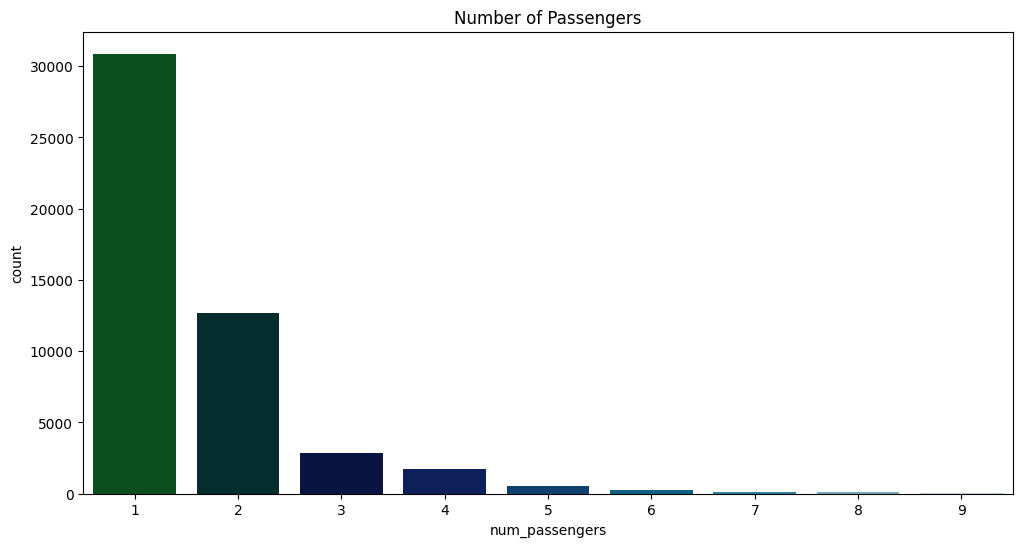

In [22]:
df['num_passengers'].value_counts(normalize=True)
plt.figure(figsize=(12,6))
plt.title('Number of Passengers')
sns.countplot(x=df['num_passengers'], data=df, palette='ocean');

In [23]:
!pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.1/233.1 kB 2.8 MB/s eta 0:00:00


In [24]:
import pycountry_convert as pc

continent = []
index = []

df['booking_origin'] = df['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')

for i, country in enumerate(df['booking_origin']):
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent.append(continent_name)
    except KeyError:
        continent.append('Others')

df['booking_continent'] = continent


In [25]:
df['booking_continent'].value_counts()

booking_continent
AS        29233
OC        18765
EU          571
NA          522
Others       81
AF           68
SA           41
Name: count, dtype: int64

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define the columns for label encoding and one-hot encoding
label_encode = ['sales_channel', 'route']
one_hot = ['booking_continent']

# Define the mapping for the trip type
mapping_trip_type = {
    'RoundTrip'  : 0,
    'OneWay'     : 1,
    'CircleTrip' : 2
}

# Apply the mapping to the 'trip_type' column
df['trip_type'] = df['trip_type'].map(mapping_trip_type)

# Apply label encoding to the specified columns
label_encoder = LabelEncoder()
for column in label_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Apply one-hot encoding to the specified columns
df = pd.get_dummies(df, columns=one_hot, prefix=one_hot)

# Drop the 'booking_origin' column
df.drop(['booking_origin'], axis=1, inplace=True)

df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_continent_AF,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_Others,booking_continent_SA
0,2,0,0,262,19,7,6,0,1,0,0,5.52,0,False,False,False,False,True,False,False
1,1,0,0,112,20,3,6,0,0,0,0,5.52,0,False,False,False,False,True,False,False
2,2,0,0,243,22,17,3,0,1,1,0,5.52,0,False,True,False,False,False,False,False
3,1,0,0,96,31,4,6,0,0,0,1,5.52,0,False,False,False,False,True,False,False
4,2,0,0,68,22,15,3,0,1,0,1,5.52,0,False,True,False,False,False,False,False


In [28]:
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_continent_AF,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_Others,booking_continent_SA
49995,2,0,0,27,6,9,6,720,1,0,1,5.62,0,False,False,False,False,True,False,False
49996,1,0,0,111,6,4,7,720,0,0,0,5.62,0,False,False,False,False,True,False,False
49997,1,0,0,24,6,22,6,720,0,0,1,5.62,0,False,False,False,False,True,False,False
49998,1,0,0,15,6,11,1,720,1,0,1,5.62,0,False,False,False,False,True,False,False
49999,1,0,0,19,6,10,4,720,0,1,0,5.62,0,False,False,False,False,True,False,False


In [29]:
df.drop(['route'], axis=1, inplace=True)

In [30]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_continent_AF,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_Others,booking_continent_SA
0,2,0,0,262,19,7,6,1,0,0,5.52,0,False,False,False,False,True,False,False
1,1,0,0,112,20,3,6,0,0,0,5.52,0,False,False,False,False,True,False,False
2,2,0,0,243,22,17,3,1,1,0,5.52,0,False,True,False,False,False,False,False
3,1,0,0,96,31,4,6,0,0,1,5.52,0,False,False,False,False,True,False,False
4,2,0,0,68,22,15,3,1,0,1,5.52,0,False,True,False,False,False,False,False


In [31]:
from re import X
#@title Train Test Split
from sklearn.model_selection import train_test_split

X = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
y_train.value_counts(normalize=True)

booking_complete
0    0.850041
1    0.149959
Name: proportion, dtype: float64

In [33]:
#@title Sampling Data (Oversampling)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train.ravel())

In [34]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def confusionmatrix(predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_resampled)


    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_resampled, y_pred_train))

Accuracy (Test Set): 0.85
Precision (Test Set): 0.43
Recall (Test Set): 0.04
F1-Score (Test Set): 0.08
roc_auc (test-proba): 0.52
roc_auc (train-proba): 0.53


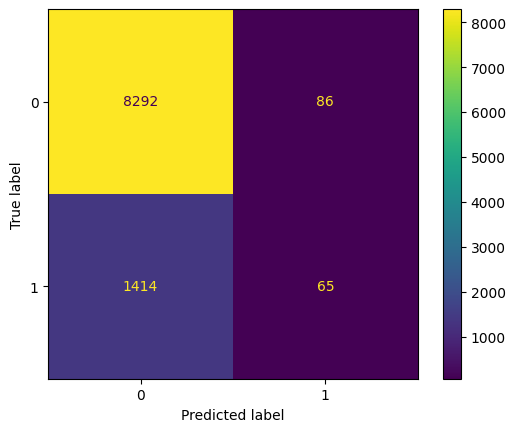

In [35]:
#@title Model 1: XGBoost
import xgboost as xgb

model_1 = xgb.XGBClassifier(random_state=42)
model_1.fit(X_train, y_train)

predictions = model_1.predict(X_test)
confusionmatrix(predictions)
eval_classification(model_1)

<Axes: >

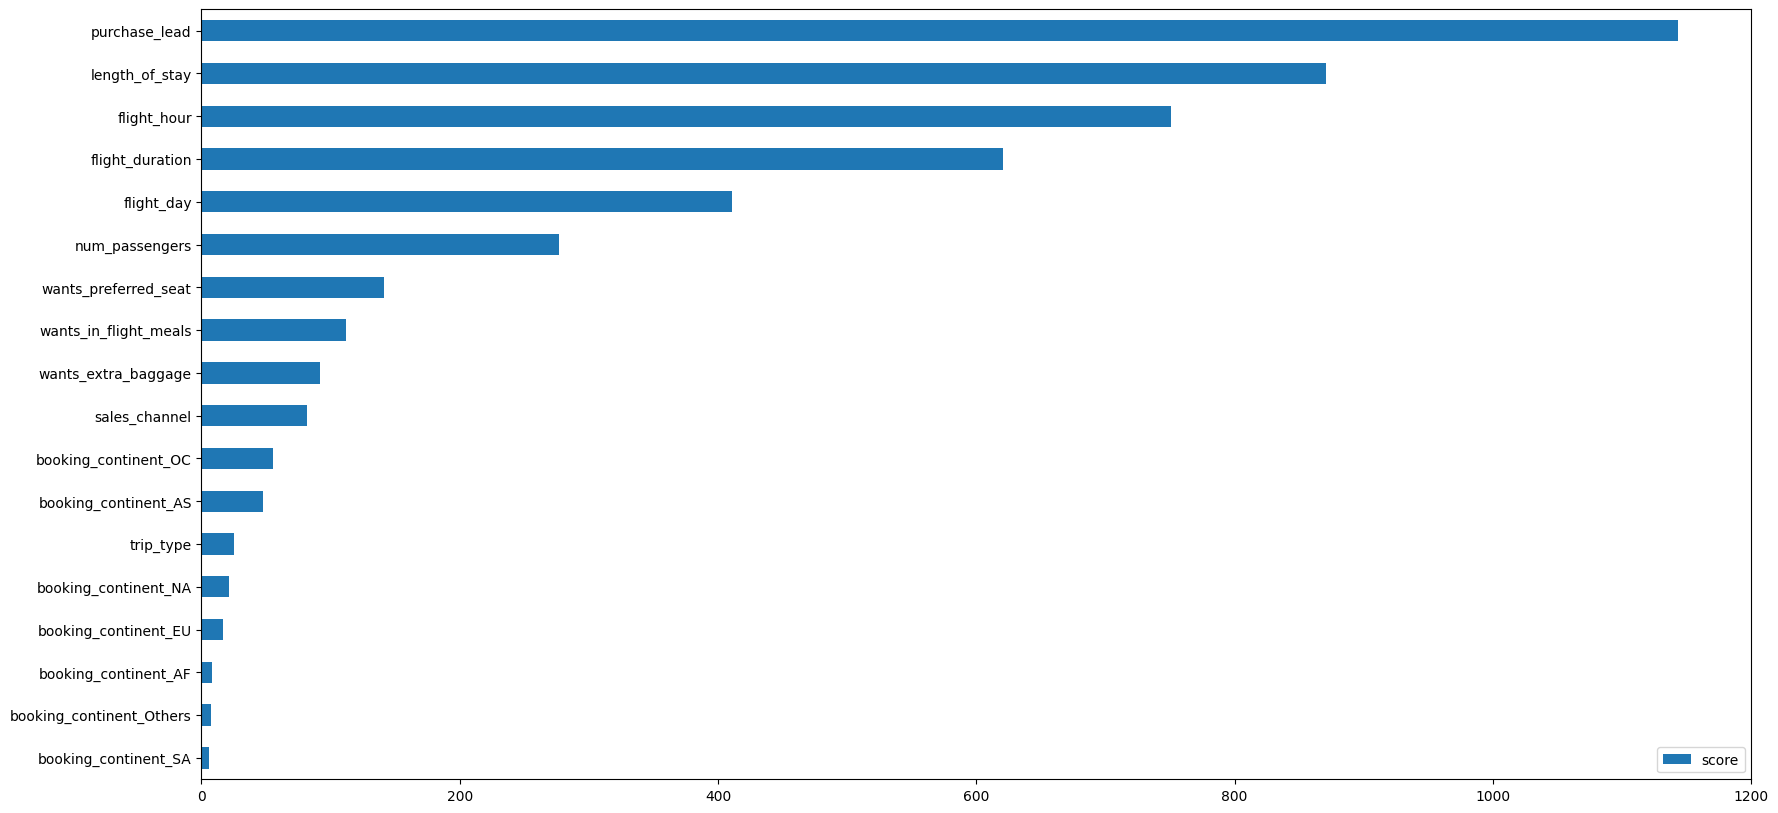

In [36]:
feature_important = model_1.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.nlargest(40, columns="score").sort_values(by = "score", ascending=True).plot(kind='barh', figsize = (20,10)) ## plot top 40 features

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy (Test Set): 0.83
Precision (Test Set): 0.35
Recall (Test Set): 0.14
F1-Score (Test Set): 0.20
roc_auc (test-proba): 0.55
roc_auc (train-proba): 0.98
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      8378
           1       0.35      0.14      0.20      1479

    accuracy                           0.83      9857
   macro avg       0.61      0.55      0.55      9857
weighted avg       0.79      0.83      0.80      9857



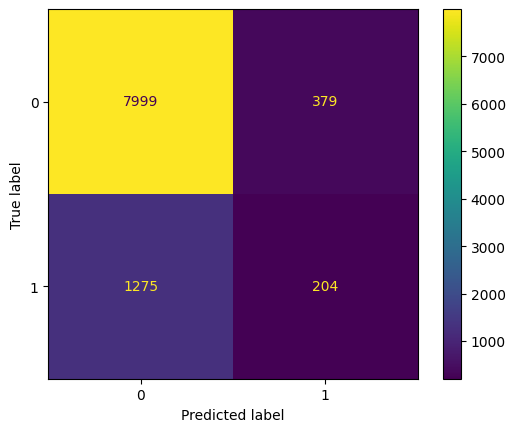

In [37]:
#@title Model 2: Fine Tuned XGBoost
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np
from xgboost import XGBClassifier

# Define a smaller set of hyperparameters for quicker search
hyperparameters = {
    'max_depth': [int(x) for x in np.linspace(10, 110, num=3)],
    'min_child_weight': [int(x) for x in np.linspace(1, 20, num=3)],
    'gamma': [float(x) for x in np.linspace(0, 1, num=3)],
    'tree_method': ['auto', 'exact', 'approx', 'hist'],
    'colsample_bytree': [float(x) for x in np.linspace(0.3, 0.7, num=3)],
    'eta': [float(x) for x in np.linspace(0.01, 0.1, num=3)],
    'lambda': [float(x) for x in np.linspace(0.1, 0.5, num=3)],
    'alpha': [float(x) for x in np.linspace(0.1, 0.5, num=3)]
}

base_model = XGBClassifier(random_state=42)

# Reduce the number of iterations for a quicker search
model_2 = RandomizedSearchCV(base_model, hyperparameters, n_iter=10, cv=3, random_state=42, scoring='recall', verbose=1)
#model_2 = GridSearchCV(base_model, hyperparameters, cv=3, scoring='recall', verbose=1
model_2.fit(X_train_resampled, y_train_resampled)

eval_classification(model_2)

predictions = model_2.predict(X_test)
confusionmatrix(predictions)
print(classification_report(y_test, predictions))

Accuracy (Test Set): 0.56
Precision (Test Set): 0.22
Recall (Test Set): 0.76
F1-Score (Test Set): 0.34
roc_auc (test-proba): 0.64
roc_auc (train-proba): 0.72


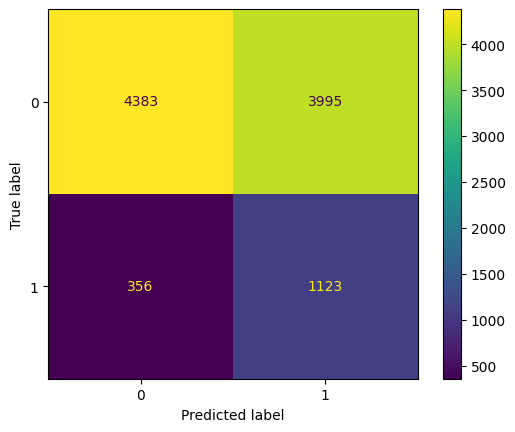

In [38]:
#@title Model 3: Naive Bayes
from sklearn.naive_bayes import GaussianNB

model_3 = GaussianNB()
model_3.fit(X_train_resampled, y_train_resampled)

eval_classification(model_3)
predictions = model_3.predict(X_test)
confusionmatrix(predictions)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.26
Recall (Test Set): 0.23
F1-Score (Test Set): 0.25
roc_auc (test-proba): 0.56
roc_auc (train-proba): 1.00


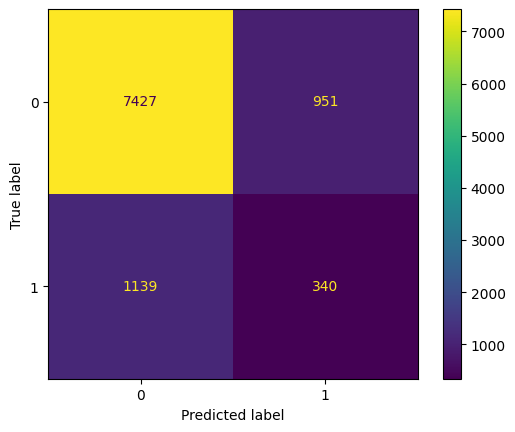

In [39]:
#@title Model 4: Random Forest
from sklearn.ensemble import RandomForestClassifier

model_4 = RandomForestClassifier(random_state=42)
model_4.fit(X_train_resampled, y_train_resampled)

eval_classification(model_4)
predictions = model_4.predict(X_test)
confusionmatrix(predictions)